In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
cd /content/drive/MyDrive/TUBES\ PSSO\ 2021

/content/drive/MyDrive/TUBES PSSO 2021


In [161]:
ls

'2101202085 - TUBES (UAS) Tsabita Al Asshifa Hadi Kusuma.ipynb'
 Autocorrelation.ipynb
 best_weight_scene/
 Cancer_Clustering.ipynb
 classify_iris_ANN.ipynb
'data_cancer (1).gsheet'
 data_cancer.csv
 data_cancer.gsheet
 Iris_Clustering.ipynb
 multiclass_classification_colab.ipynb
 README.md
 scene_dataset_using_ANN.ipynb
 scenes_cnn.ipynb
 scenes_nn_4_layers.ipynb
 Simple_ANN_in_Python.ipynb


In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.applications.mobilenet import MobileNet
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

In [163]:
df = pd.read_csv('data_cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [164]:
df = df.drop(columns=['Unnamed: 32'])

In [165]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


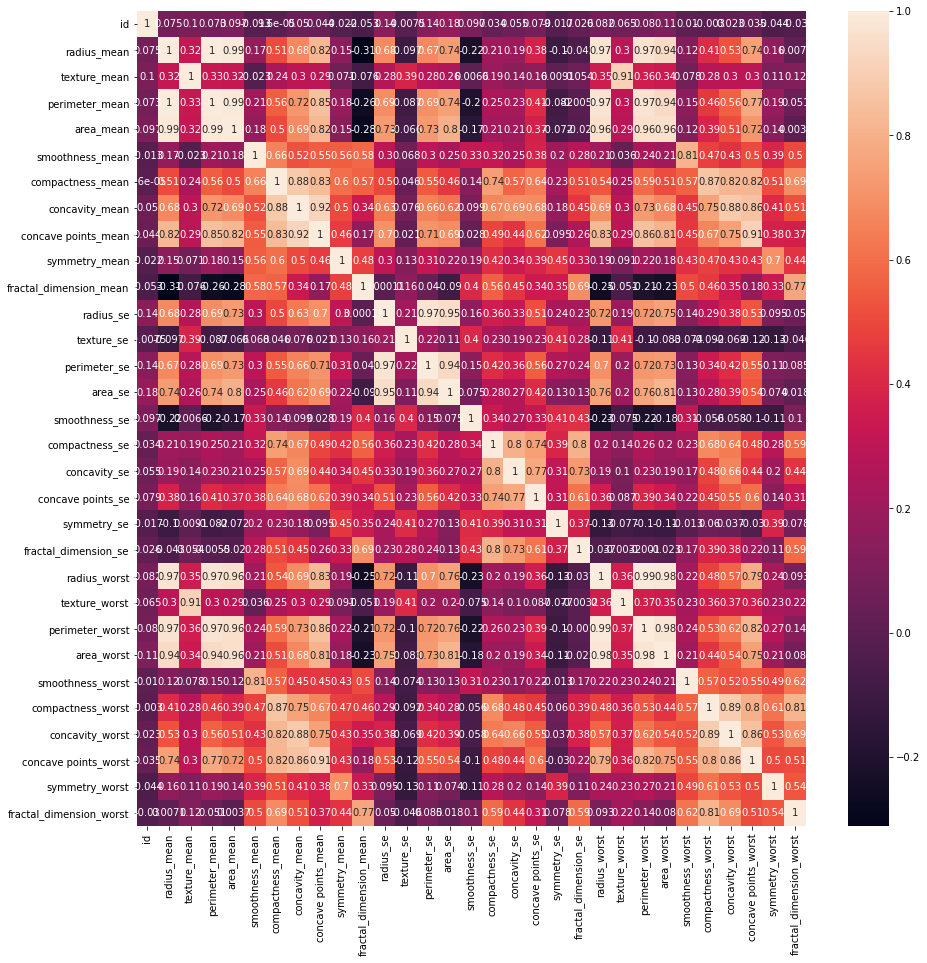

In [166]:
fig=plt.subplots(figsize=(15,15))
corr=df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [167]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [168]:
x = df.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]].values
y = df.iloc[:, 1].values
x.shape

(569, 30)

In [169]:
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [170]:
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

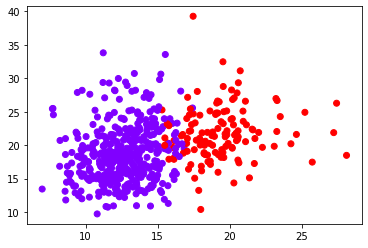

In [171]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans, cmap='rainbow')

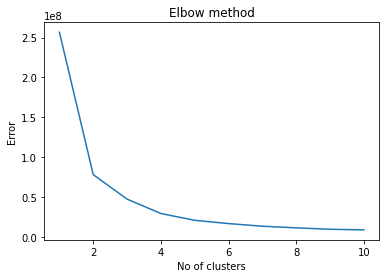

In [172]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

#PCA

In [173]:
x = StandardScaler().fit_transform(x)

In [174]:
x.shape

(569, 30)

In [175]:
#standardized the data
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst','smoothness_worst', 'compactness_worst','concavity_worst','concave points_worst','symmetry_worst', 'fractal_dimension_worst']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['diagnosis']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [176]:
standardized_df = pd.DataFrame(x, columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst','smoothness_worst', 'compactness_worst','concavity_worst','concave points_worst','symmetry_worst', 'fractal_dimension_worst'])
standardized_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [177]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [178]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [179]:
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


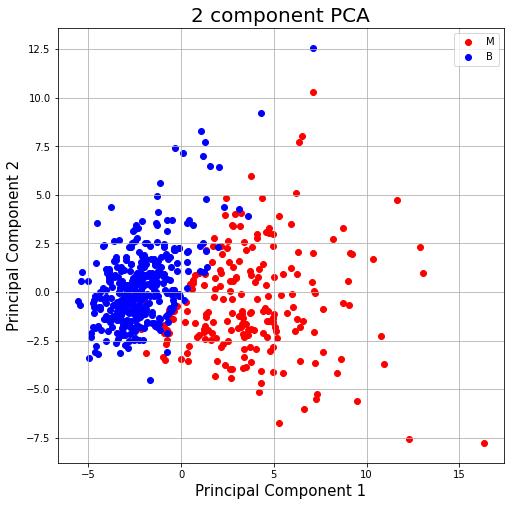

In [180]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

In [181]:
X2=df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']]
Y2=df[['diagnosis']]

In [182]:
X2 = StandardScaler().fit_transform(X2)
X2.shape

(569, 5)

In [183]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X2)
principalDf2 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf2.head()

,principal component 1,principal component 2
0,1.562077,2.464472
1,2.801064,-0.466274
2,2.848768,0.593637
3,-0.658477,2.624944
4,2.718517,0.897870


In [184]:
finalDf2 = pd.concat([principalDf2, df[['diagnosis']]], axis = 1)
finalDf2.head()

,principal component 1,principal component 2,diagnosis
0,1.562077,2.464472,M
1,2.801064,-0.466274,M
2,2.848768,0.593637,M
3,-0.658477,2.624944,M
4,2.718517,0.897870,M


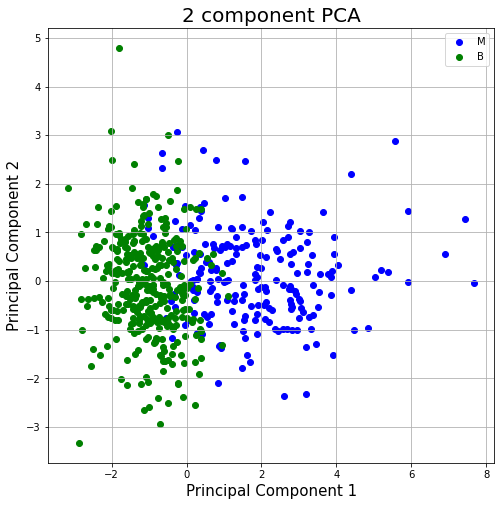

In [185]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['diagnosis'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

In [186]:
cancer = datasets.load_iris()

X = cancer.data
y = cancer.target
target = cancer.target

pca = PCA(n_components= 2)
X_r1 = pca.fit_transform(X)

print('explained variance ratio(first two components): %s'
      %str(pca.explained_variance_ratio_))

explained variance ratio(first two components): [0.92461872 0.05306648]


Text(0.5, 1.0, 'PCA of Cancer Clustering')

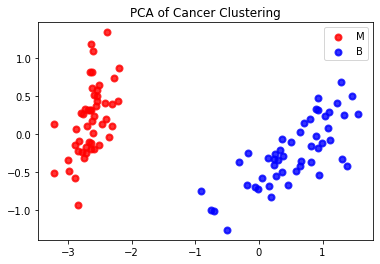

In [187]:
plt.figure()
target = ['M', 'B']
colors = ['r', 'b']
lw = 2


for color, i, target in zip(colors,[0, 1], target):
  plt.scatter(X_r1[y == i, 0], X_r1[y == i,1], alpha=.8, color=color, lw=lw,
              label = target)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('PCA of Cancer Clustering')

In [188]:
(trainX, testX, trainY, testY) = train_test_split(np.array(X),	np.array(y), test_size=0.2)

print(trainX.shape)
print(testX.shape)

print(trainY.shape)
print(testY.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [189]:
es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [190]:
model = Sequential(
    [   
        Flatten(input_shape=(4,)),
        Dense(128, activation="relu", name="layer1"),
        Dense(128, activation="relu", name="layer2"),
        Dense(1, activation = "sigmoid", name="layer3"),
    ]
)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 4)                 0         
_________________________________________________________________
layer1 (Dense)               (None, 128)               640       
_________________________________________________________________
layer2 (Dense)               (None, 128)               16512     
_________________________________________________________________
layer3 (Dense)               (None, 1)                 129       
Total params: 17,281
Trainable params: 17,281
Non-trainable params: 0
_________________________________________________________________


In [191]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [192]:
T = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

Epoch 1/50
4/4 [==============================] - 1s 110ms/step - loss: 0.7393 - accuracy: 0.2944 - val_loss: 0.5209 - val_accuracy: 0.4000

Epoch 00001: val_accuracy improved from -inf to 0.40000, saving model to best_weight_scene
INFO:tensorflow:Assets written to: best_weight_scene/assets
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6070 - accuracy: 0.3006 - val_loss: 0.4895 - val_accuracy: 0.4000

Epoch 00002: val_accuracy did not improve from 0.40000
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 0.5521 - accuracy: 0.3256 - val_loss: 0.4319 - val_accuracy: 0.4000

Epoch 00003: val_accuracy did not improve from 0.40000
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.4884 - accuracy: 0.3242 - val_loss: 0.3587 - val_accuracy: 0.7000

Epoch 00004: val_accuracy improved from 0.40000 to 0.70000, saving model to best_weight_scene
INFO:tensorflow:Assets written to: best_weight_scene/assets
Epoch 5/50
4/4 [========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


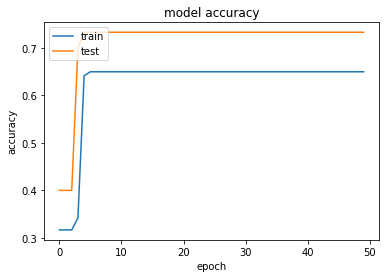

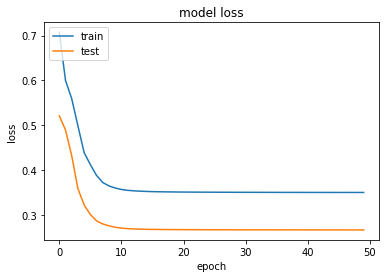

In [193]:
print(T.history.keys())
# summarize history for accuracy
plt.plot(T.history['accuracy'])
plt.plot(T.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(T.history['loss'])
plt.plot(T.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#LDA

In [194]:
cancer = datasets.load_iris()

X = cancer.data
y = cancer.target
target = cancer.target

lda = LinearDiscriminantAnalysis (n_components= 2)
X1 =  lda.fit_transform(X, y)

print('explained variance ratio(first two components): %s'
      %str(lda.explained_variance_ratio_))

explained variance ratio(first two components): [0.9912126 0.0087874]


Text(0.5, 1.0, 'LDA of Cancer Clustering')

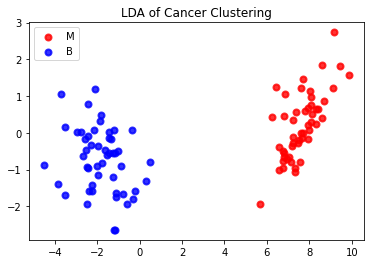

In [195]:
plt.figure()
target = ['M', 'B']
colors = ['r', 'b']
lw = 2
for color, i, target in zip(colors,[0, 1], target):
  plt.scatter(X1[y == i, 0], X1[y == i,1], alpha=.8, color=color, lw=lw,
              label = target)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('LDA of Cancer Clustering')

In [196]:
print(x)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [197]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [198]:
(trainX, testX, trainY, testY) = train_test_split(np.array(X),	np.array(y), test_size=0.2)

print(trainX.shape)
print(testX.shape)

print(trainY.shape)
print(testY.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [199]:
es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [200]:
model = Sequential(
    [   
        Flatten(input_shape=(4,)),
        Dense(128, activation="relu", name="layer1"),
        Dense(128, activation="relu", name="layer2"),
        Dense(1, activation = "sigmoid", name="layer3"),
    ]
)
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 4)                 0         
_________________________________________________________________
layer1 (Dense)               (None, 128)               640       
_________________________________________________________________
layer2 (Dense)               (None, 128)               16512     
_________________________________________________________________
layer3 (Dense)               (None, 1)                 129       
Total params: 17,281
Trainable params: 17,281
Non-trainable params: 0
_________________________________________________________________


In [201]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [202]:
T = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

Epoch 1/50
4/4 [==============================] - 1s 104ms/step - loss: 1.0827 - accuracy: 0.3577 - val_loss: 0.5725 - val_accuracy: 0.2667

Epoch 00001: val_accuracy improved from -inf to 0.26667, saving model to best_weight_scene
INFO:tensorflow:Assets written to: best_weight_scene/assets
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 0.5811 - accuracy: 0.3650 - val_loss: 0.5376 - val_accuracy: 0.2667

Epoch 00002: val_accuracy did not improve from 0.26667
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.5607 - accuracy: 0.3369 - val_loss: 0.5454 - val_accuracy: 0.2667

Epoch 00003: val_accuracy did not improve from 0.26667
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 0.5549 - accuracy: 0.3369 - val_loss: 0.5270 - val_accuracy: 0.2667

Epoch 00004: val_accuracy did not improve from 0.26667
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.5227 - accuracy: 0.3556 - val_loss: 0.4776 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


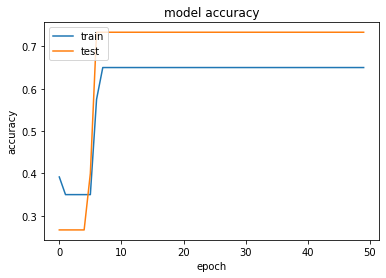

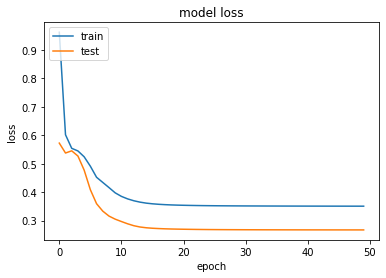

In [203]:
print(T.history.keys())
# summarize history for accuracy
plt.plot(T.history['accuracy'])
plt.plot(T.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(T.history['loss'])
plt.plot(T.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#FA

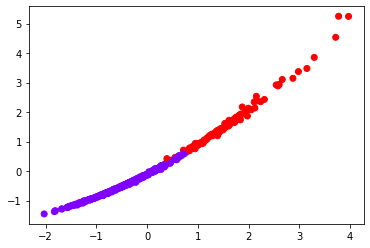

In [204]:
plt.scatter(x[:,0], x[:,3], c=y_kmeans, cmap='rainbow')

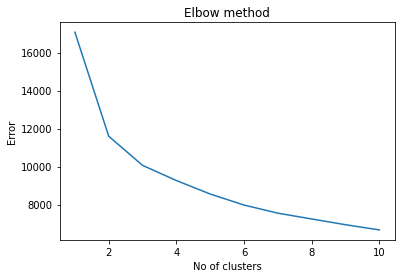

In [205]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [206]:
cancer = datasets.load_iris()

X = cancer.data
y = cancer.target
target = cancer.target

fa = FactorAnalysis(n_components= 2)
X_r2 = fa.fit_transform(X)
X_r2 [:5]

array([[-1.32761727, -0.56131076],
       [-1.33763854, -0.00279765],
       [-1.40281483,  0.30634949],
       [-1.30104274,  0.71882683],
       [-1.33342439, -0.36458899]])

In [207]:
x = StandardScaler().fit_transform(x)

Text(0.5, 1.0, 'FA of Cancer clustering')

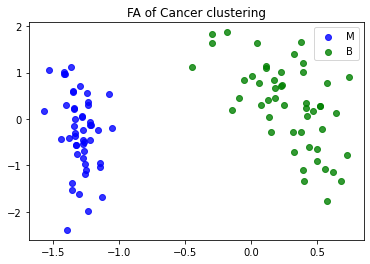

In [208]:
plt.figure()
target = ['M', 'B']
colors = ['b', 'g']

for color, i, target in zip(colors,[0, 1], target):
  plt.scatter(X_r2[y == i, 0], X_r2[y == i,1], alpha=.8, color=color,
              label = target)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('FA of Cancer clustering')

In [209]:
print(x)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [210]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [211]:
(trainX, testX, trainY, testY) = train_test_split(np.array(X),	np.array(y), test_size=0.2)

print(trainX.shape)
print(testX.shape)

print(trainY.shape)
print(testY.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [212]:
es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [213]:
model = Sequential(
    [   
        Flatten(input_shape=(4,)),
        Dense(128, activation="relu", name="layer1"),
        Dense(128, activation="relu", name="layer2"),
        Dense(1, activation = "sigmoid", name="layer3"),
    ]
)
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 4)                 0         
_________________________________________________________________
layer1 (Dense)               (None, 128)               640       
_________________________________________________________________
layer2 (Dense)               (None, 128)               16512     
_________________________________________________________________
layer3 (Dense)               (None, 1)                 129       
Total params: 17,281
Trainable params: 17,281
Non-trainable params: 0
_________________________________________________________________


In [214]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [215]:
T = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

Epoch 1/50
4/4 [==============================] - 1s 114ms/step - loss: 0.8901 - accuracy: 0.3162 - val_loss: 0.6545 - val_accuracy: 0.3333

Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to best_weight_scene
INFO:tensorflow:Assets written to: best_weight_scene/assets
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 0.5742 - accuracy: 0.3656 - val_loss: 0.5915 - val_accuracy: 0.3333

Epoch 00002: val_accuracy did not improve from 0.33333
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 0.5788 - accuracy: 0.3198 - val_loss: 0.5687 - val_accuracy: 0.3333

Epoch 00003: val_accuracy did not improve from 0.33333
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5468 - accuracy: 0.3198 - val_loss: 0.5306 - val_accuracy: 0.3333

Epoch 00004: val_accuracy did not improve from 0.33333
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.4873 - accuracy: 0.3596 - val_loss: 0.4837 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


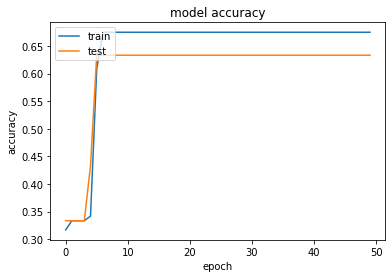

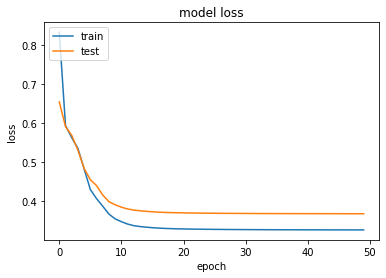

In [216]:
print(T.history.keys())
# summarize history for accuracy
plt.plot(T.history['accuracy'])
plt.plot(T.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(T.history['loss'])
plt.plot(T.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()